In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

In [7]:
df=pd.read_csv("./data/alone.csv")
df.columns=["time","text","name","location"]
df.head()

,time,text,name,location
0,2022-09-21 08:00:19+00:00,b'Loneliness \xf0\x9f\x96\xa4 #Alone\nCheck ou...,b'Madhare911',b'Italian'
1,2022-09-21 06:57:27+00:00,b'TRAVEL TIPS #solotravel #travel #travelvlog ...,b'KDulcibella',b''
2,2022-09-21 05:28:43+00:00,b'What to do when you feel I can\xe2\x80\x99t ...,b'ShringiAmitta',"b'Jaipur, Chandigarh, Kota'"
3,2022-09-21 05:21:58+00:00,b'#Suena Midnight Train - Sam Smith\n\n#Sad #A...,b'RomeAkaDrama',b'Bogota'
4,2022-09-21 05:08:04+00:00,"b'Psychology says, You become unstoppable when...",b'SukhaneMeer',b''


In [8]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
    x = re.sub(r'^RT[\s]+', " ", x)
    x = re.sub(r'https?:\/\/.*[\r\n]*', " ", x)
    x = re.sub(r'#', "", x)
    x = re.sub(r'@[A-Za-z0–9]+', "", x) 
    return x
df['text'] = df['text'].apply(clean)

In [12]:
df1=df['text']
df1.head(10)

0    b'Loneliness \xf0\x9f\x96\xa4 Alone\nCheck out...
1    b'TRAVEL TIPS solotravel travel travelvlog usa...
2    b'What to do when you feel I can\xe2\x80\x99t ...
3    b'Suena Midnight Train - Sam Smith\n\nSad Alon...
4    b'Psychology says, You become unstoppable when...
5    b'\xe2\x80\x9cIf I were with you I\xe2\x80\x99...
6    b"Mohanlal Barroz  Monster Empuraan Alone Good...
7    b'Welcome! Why containment is important Buried...
8    b'I need a gym partner alone gym partner gymbr...
9    b"It costs $0.00 to remind someone they aren't...
Name: text, dtype: object

In [13]:
# sentiment analysis

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['text'].apply(polarity)
df['subjectivity'] = df['text'].apply(subjectivity)

In [14]:
df.head()

,time,text,name,location,polarity,subjectivity
0,2022-09-21 08:00:19+00:00,b'Loneliness \xf0\x9f\x96\xa4 Alone\nCheck out...,b'Madhare911',b'Italian',0.0,0.0
1,2022-09-21 06:57:27+00:00,b'TRAVEL TIPS solotravel travel travelvlog usa...,b'KDulcibella',b'',0.0,0.0
2,2022-09-21 05:28:43+00:00,b'What to do when you feel I can\xe2\x80\x99t ...,b'ShringiAmitta',"b'Jaipur, Chandigarh, Kota'",0.0,0.0
3,2022-09-21 05:21:58+00:00,b'Suena Midnight Train - Sam Smith\n\nSad Alon...,b'RomeAkaDrama',b'Bogota',0.5,0.6
4,2022-09-21 05:08:04+00:00,"b'Psychology says, You become unstoppable when...",b'SukhaneMeer',b'',0.0,0.0


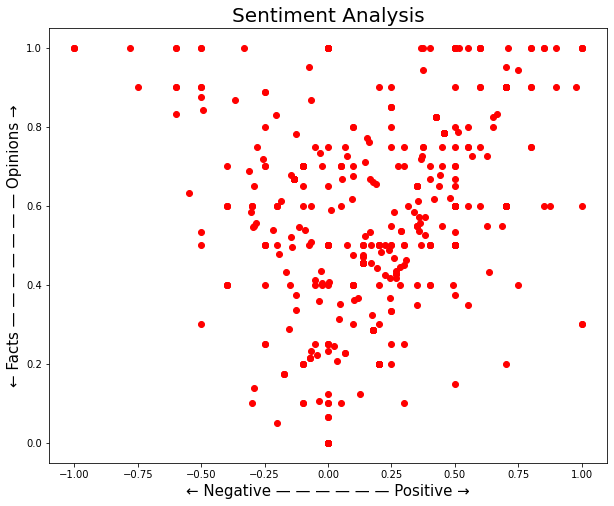

In [16]:
#visualizations

# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
    x = df.polarity.loc[Tweets]
    y = df.subjectivity.loc[Tweets]
    plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [17]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df['analysis'] = df['polarity'].apply(ratio)

In [18]:
df.head()

,time,text,name,location,polarity,subjectivity,analysis
0,2022-09-21 08:00:19+00:00,b'Loneliness \xf0\x9f\x96\xa4 Alone\nCheck out...,b'Madhare911',b'Italian',0.0,0.0,0
1,2022-09-21 06:57:27+00:00,b'TRAVEL TIPS solotravel travel travelvlog usa...,b'KDulcibella',b'',0.0,0.0,0
2,2022-09-21 05:28:43+00:00,b'What to do when you feel I can\xe2\x80\x99t ...,b'ShringiAmitta',"b'Jaipur, Chandigarh, Kota'",0.0,0.0,0
3,2022-09-21 05:21:58+00:00,b'Suena Midnight Train - Sam Smith\n\nSad Alon...,b'RomeAkaDrama',b'Bogota',0.5,0.6,1
4,2022-09-21 05:08:04+00:00,"b'Psychology says, You become unstoppable when...",b'SukhaneMeer',b'',0.0,0.0,0


In [19]:
df['analysis'].value_counts()

 0    338
 1    309
-1    124
Name: analysis, dtype: int64

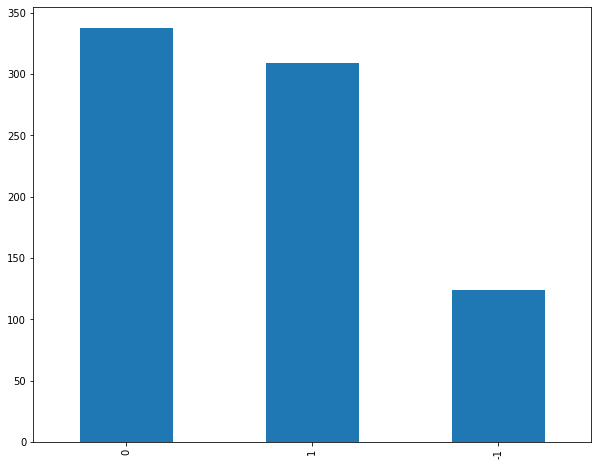

In [21]:
# Plotting
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()